# <center>Tutorial-6.1</center>
## <center>Link Prediction using GNNs (Transductive vs Inductive Learning): Part-1</center>

## Table of Contents
1. Introduction
2. Creating a Dummy Graph
3. Data Preparation - Cora Dataset for Link prediction
4. Model Implementations
5. Training and Evaluation



## 1. Introduction

In this tutorial we will first understand how we can slpit the given data for the link prediction task. Later on we will see how can we do link prediction on some realword datasets.

Number of nodes: 50
Number of edges: 192
Number of node features: 10


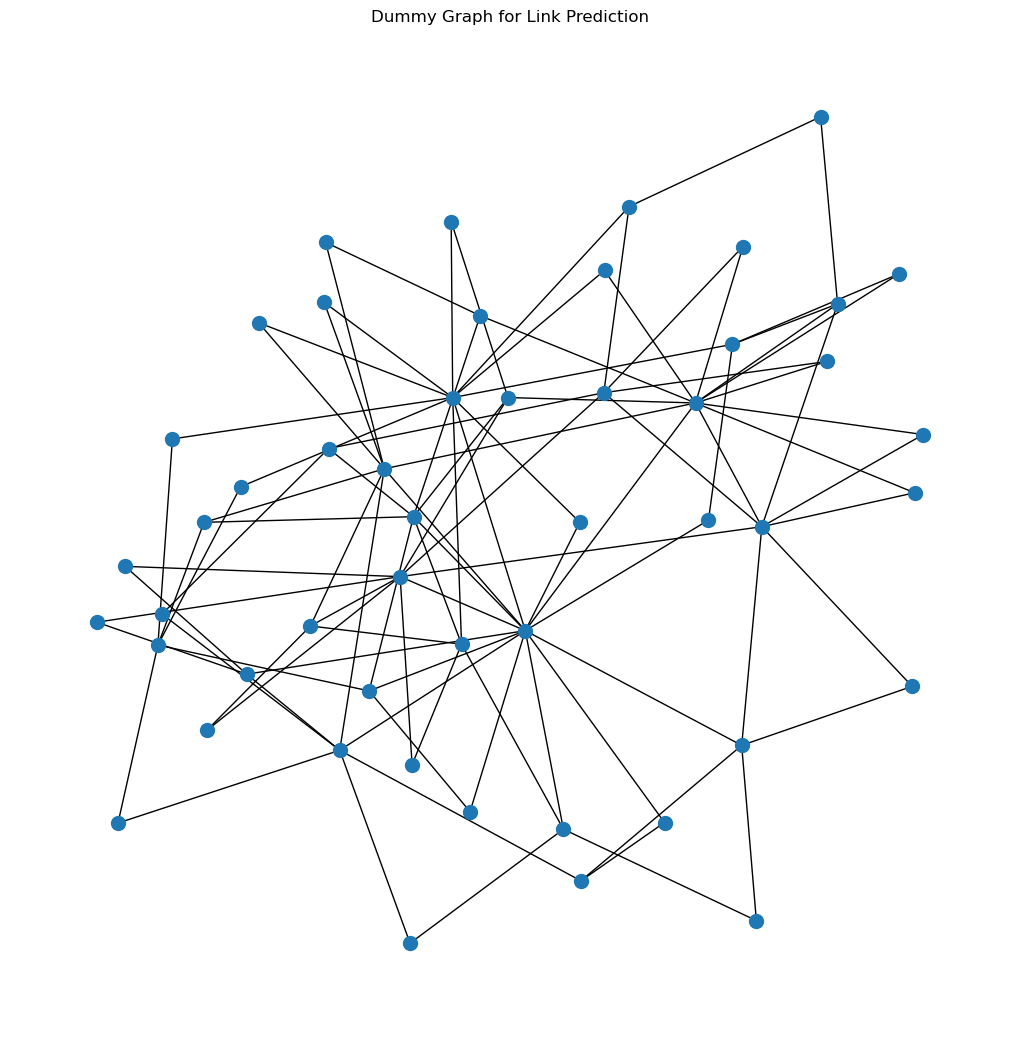

In [1]:
##  Creating a Dummy Graph

# First, let's create a dummy graph with 50 nodes.


import torch
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import from_networkx, train_test_split_edges, negative_sampling


# Set random seed for reproducibility
torch.manual_seed(42)

# Create a dummy graph using NetworkX
num_nodes = 50
G = nx.barabasi_albert_graph(n=num_nodes, m=2)

# Convert to PyTorch Geometric data object
data = from_networkx(G)

# Add dummy node features (random in this case)
data.x = torch.randn(num_nodes, 10)  # 10-dimensional node features

print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node features: {data.num_features}")

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Calculate layout once and reuse
nx.draw(G, node_size=100, with_labels=False)
plt.title("Dummy Graph for Link Prediction")
plt.show()


/home/animesh/miniconda3/envs/ainimesh/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


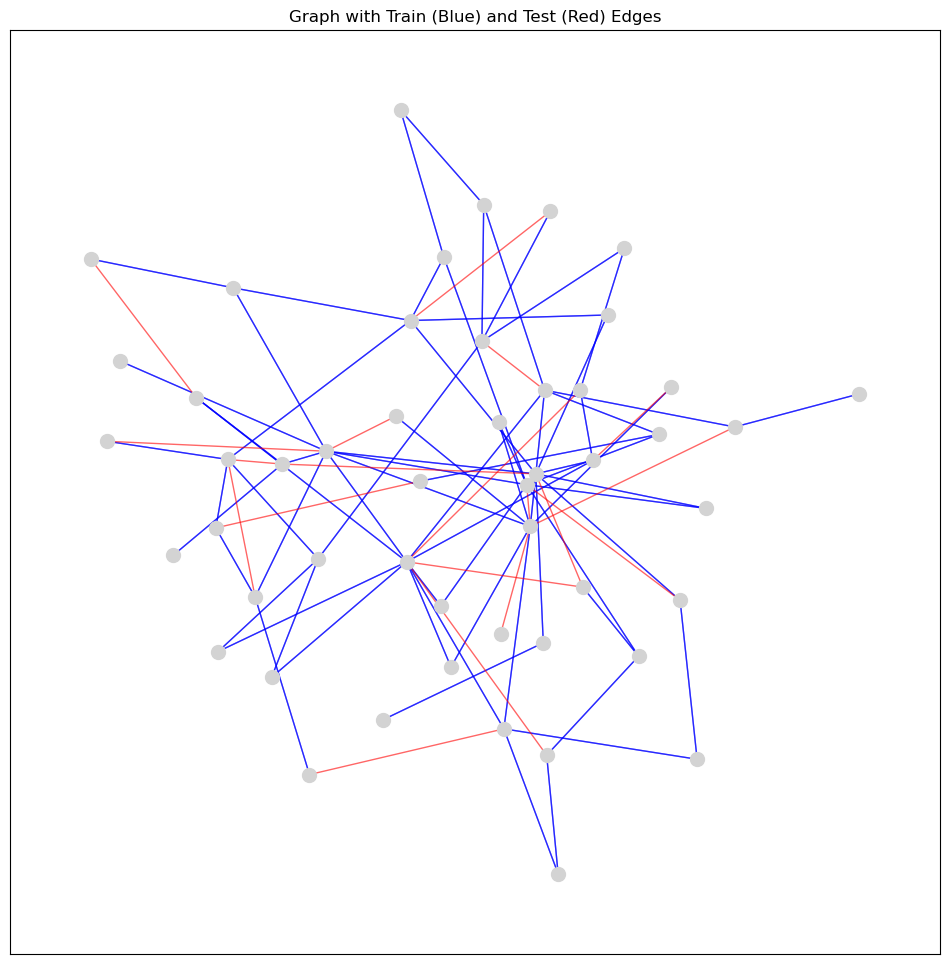

Number of training edges: 136
Number of validation edges: 9
Number of test edges: 19


In [2]:
#  Split edges for train and test sets
data1 = train_test_split_edges(data, val_ratio=0.1, test_ratio=0.2)

#  Visualize the graph with train and test edges colored differently
plt.figure(figsize=(12, 12))

# Draw all nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightgray')

# Draw train edges
train_edges = data1.train_pos_edge_index.t().tolist()
nx.draw_networkx_edges(G, pos, edgelist=train_edges, edge_color='blue', alpha=0.6)

# Draw test edges
test_edges = data1.test_pos_edge_index.t().tolist()
nx.draw_networkx_edges(G, pos, edgelist=test_edges, edge_color='red', alpha=0.6)

plt.title("Graph with Train (Blue) and Test (Red) Edges")
plt.show()

# Print information about the split
print(f"Number of training edges: {data1.train_pos_edge_index.size(1)}")
print(f"Number of validation edges: {data1.val_pos_edge_index.size(1)}")
print(f"Number of test edges: {data1.test_pos_edge_index.size(1)}")

Now, let's visualize each subset for more clarity

In [3]:
test_edges

[[26, 31],
 [4, 6],
 [1, 7],
 [2, 4],
 [8, 12],
 [1, 10],
 [1, 3],
 [11, 28],
 [5, 47],
 [0, 20],
 [2, 14],
 [10, 18],
 [5, 46],
 [25, 27],
 [2, 23],
 [13, 24],
 [6, 9],
 [17, 48],
 [9, 12]]

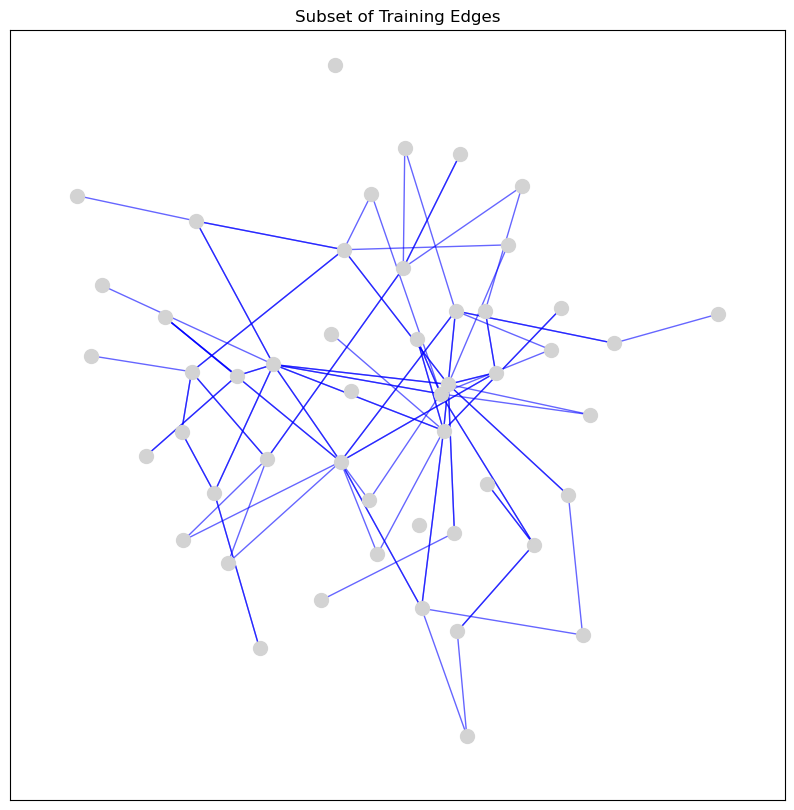

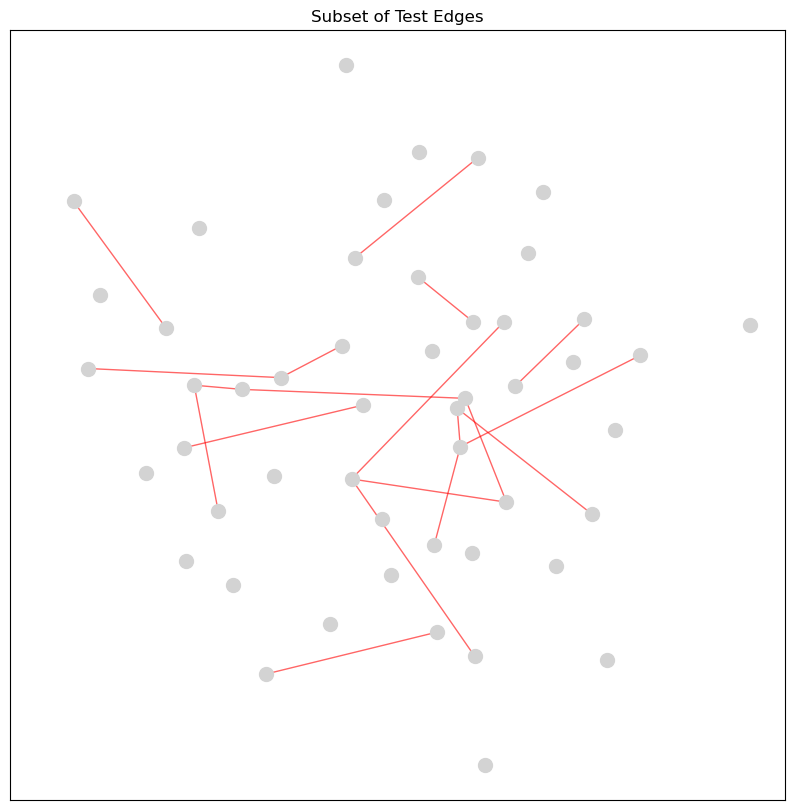

Number of negative training samples: 136


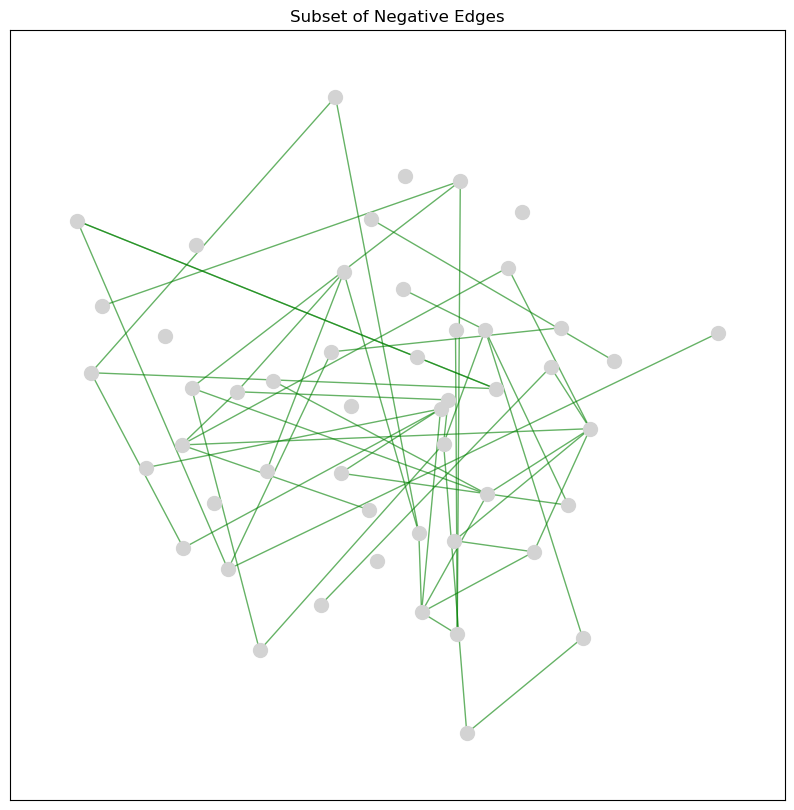

In [4]:
#  Function to visualize a subset of edges for clarity
def visualize_edge_subset(G, pos, edges, color, title):
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightgray')
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6)
    plt.title(title)
    plt.show()

# Visualize a subset of train and test edges
train_subset = train_edges[:100]  # Adjust the number as needed
test_subset = test_edges # Adjust the number as needed

visualize_edge_subset(G, pos, train_subset, 'blue', "Subset of Training Edges")
visualize_edge_subset(G, pos, test_subset, 'red', "Subset of Test Edges")

# Prepare negative samples for training
def get_negative_edges(data, num_neg_samples):
    neg_edge_index = negative_sampling(
        edge_index=data.train_pos_edge_index,
        num_nodes=data.num_nodes,
        num_neg_samples=num_neg_samples
    )
    return neg_edge_index

train_neg_edge_index = get_negative_edges(data1, data1.train_pos_edge_index.size(1))

print(f"Number of negative training samples: {train_neg_edge_index.size(1)}")

# Visualize a subset of negative edges
neg_edges = train_neg_edge_index.t().tolist()
neg_subset = neg_edges[:50]  # Adjust the number as needed

visualize_edge_subset(G, pos, neg_subset, 'green', "Subset of Negative Edges")

## Using 'transforms.RandomLinkSplit'

In [1]:
# import

from torch_geometric.transforms import RandomLinkSplit

Number of nodes: 50
Number of edges: 192
Number of node features: 10


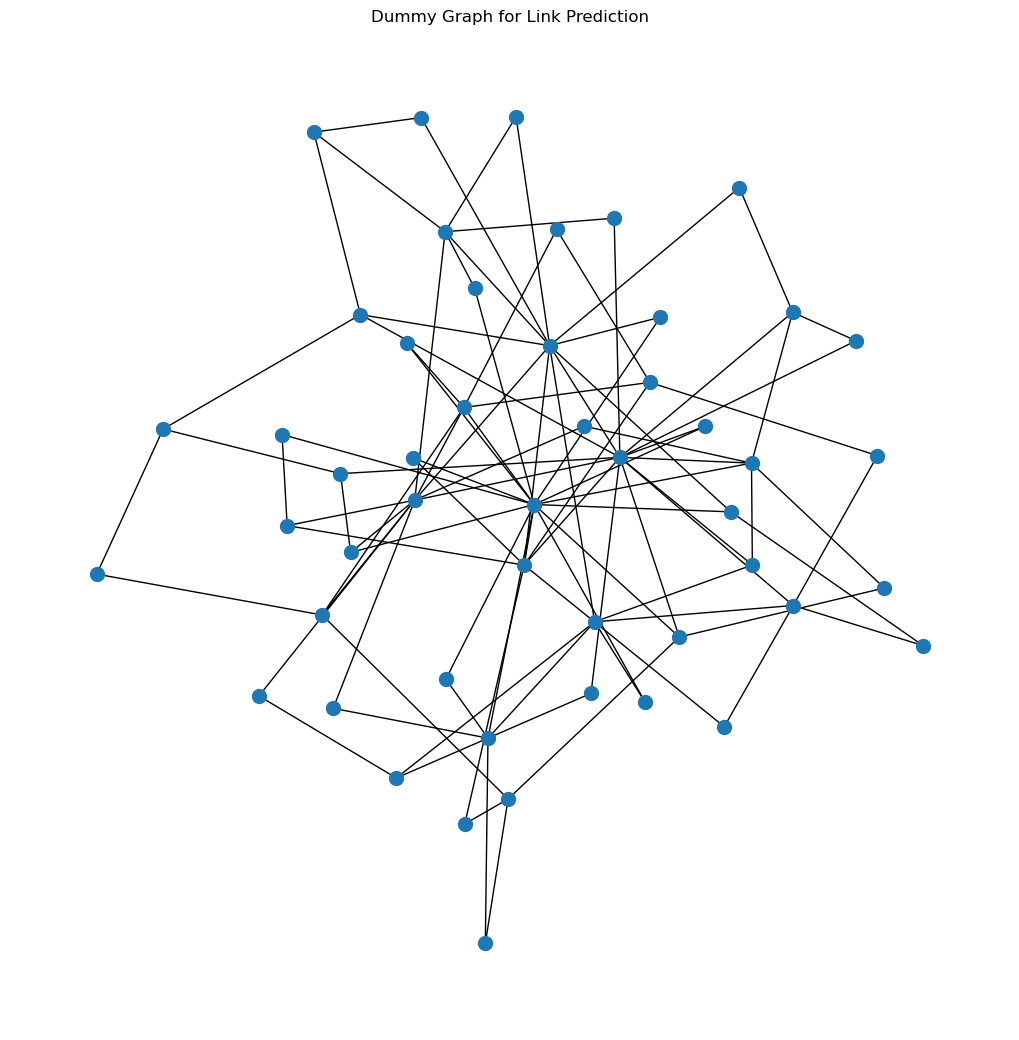

Number of training edges: 136
Number of validation edges: 136
Number of test edges: 154


In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Create a dummy graph using NetworkX
num_nodes = 50
G = nx.barabasi_albert_graph(n=num_nodes, m=2)

# Convert to PyTorch Geometric data object
data = from_networkx(G)

# Add dummy node features (random in this case)
data.x = torch.randn(num_nodes, 10)  # 10-dimensional node features

print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node features: {data.num_features}")

# Visualize the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Calculate layout once and reuse
nx.draw(G, node_size=100, with_labels=False)
plt.title("Dummy Graph for Link Prediction")
plt.show()


#  Split edges for train, val, and test sets using RandomLinkSplit
transform = RandomLinkSplit(num_val=0.1, num_test=0.2, is_undirected=True, add_negative_train_samples=False)
train_data, val_data, test_data = transform(data)

# to draw train edges
train_edges = train_data.edge_index.t().tolist()


# to draw test edges
test_edges = test_data.edge_index.t().tolist()


# Print information about the split
print(f"Number of training edges: {train_data.edge_index.size(1)}")
print(f"Number of validation edges: {val_data.edge_index.size(1)}")
print(f"Number of test edges: {test_data.edge_index.size(1)}")

- RandomLinkSplit doesn't just divide the existing edges into train/val/test sets. It actually creates new edge sets for each split, which can include both positive and negative edges.

- This method often creates more edges in total than were in the original graph. This is because:

    -   It generates negative edges (edges that don't exist in the original graph) for each split.
    -   It ensures that each split has a balanced number of positive and negative edges.





In [24]:
print(train_data)
print(val_data)
print(test_data)

Data(edge_index=[2, 136], num_nodes=50, x=[50, 10], edge_label=[68], edge_label_index=[2, 68])
Data(edge_index=[2, 136], num_nodes=50, x=[50, 10], edge_label=[18], edge_label_index=[2, 18])
Data(edge_index=[2, 154], num_nodes=50, x=[50, 10], edge_label=[38], edge_label_index=[2, 38])


#### Transformation of data

We use RandomLinkSplit to perform an edge-level random split into training, validation and test sets of a Data or a HeteroData object.

Graph has 192/2 = 96 undirected edges and we set validation ratio as 0.1 and test ratio as 0.2.

Validation edge labels
*   pos  = 96 * 0.1 ~ 9
*   neg  = 9
*   total = 18

Test edge labels
*   pos = 96 * 0.2 ~ 19
*   neg = 19
*   total = 38

Train edge labels
*   pos = 96 - 9 - 19 = 68
*   neg = 0
*   total = 68

Message passing edges
*   train: message passing = 68 * 2 = 136
*   validation: message passing = train message passing = 136
*   test: message passing = train message passing + validation edges (undirected) = 136 + 9 * 2 = 154

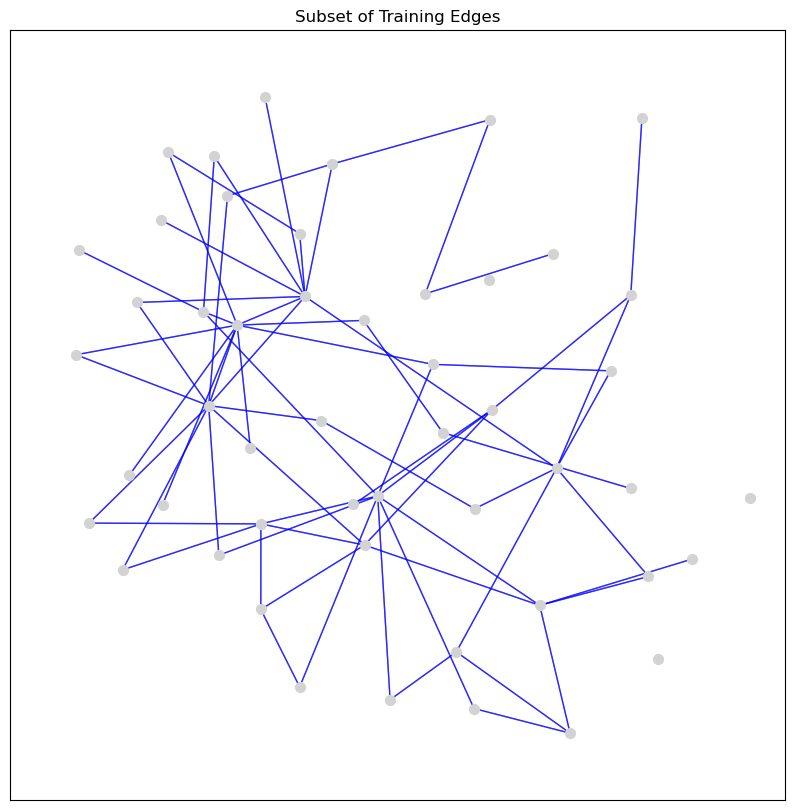

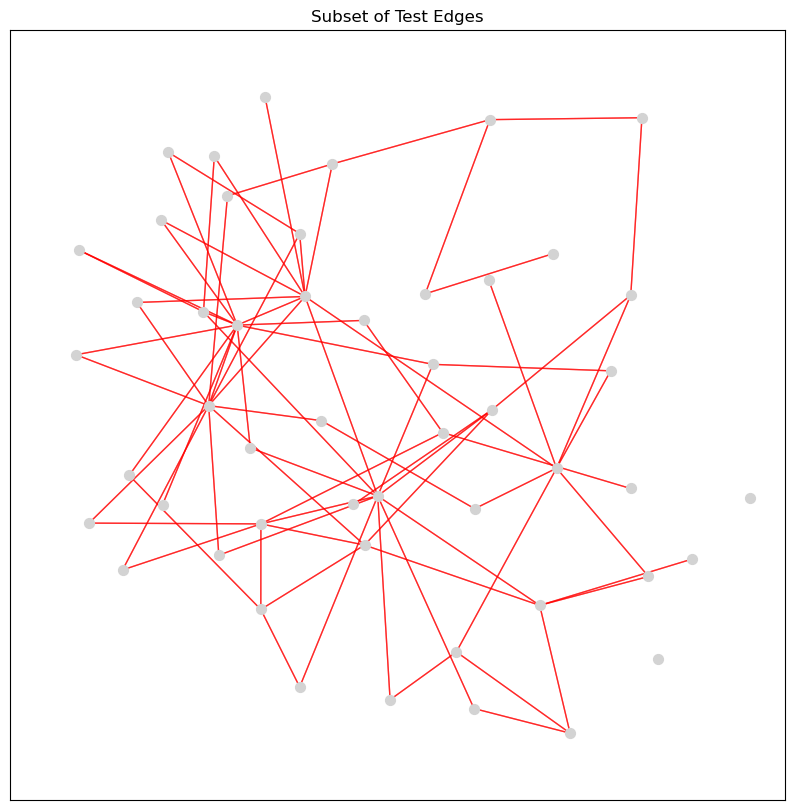

Number of negative training samples: 136


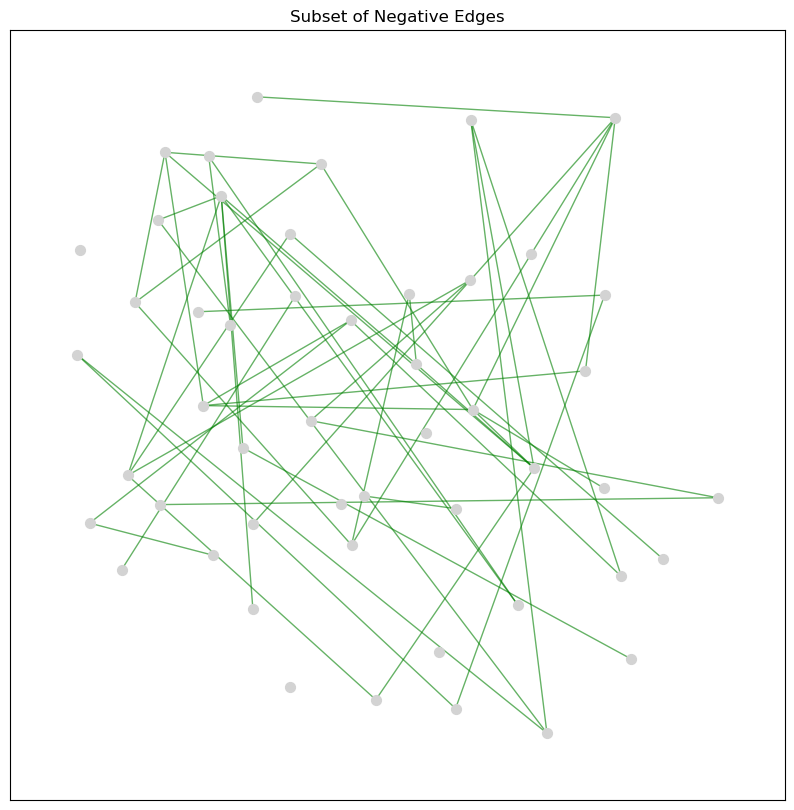

In [25]:
#  Function to visualize a subset of edges for clarity
def visualize_edge_subset(G, pos, edges, color, title):
    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=50, node_color='lightgray')
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, alpha=0.6)
    plt.title(title)
    plt.show()

# Visualize a subset of train and test edges
train_subset = train_edges  # Adjust the number as needed
test_subset = test_edges  # Adjust the number as needed

visualize_edge_subset(G, pos, train_subset, 'blue', "Subset of Training Edges")
visualize_edge_subset(G, pos, test_subset, 'red', "Subset of Test Edges")

#  Prepare negative samples for training
def get_negative_edges(edge_index, num_nodes, num_neg_samples):
    neg_edge_index = negative_sampling(
        edge_index=edge_index,
        num_nodes=num_nodes,
        num_neg_samples=num_neg_samples
    )
    return neg_edge_index

train_neg_edge_index = get_negative_edges(train_data.edge_index, data.num_nodes, train_data.edge_index.size(1))

print(f"Number of negative training samples: {train_neg_edge_index.size(1)}")

#  Visualize a subset of negative edges
neg_edges = train_neg_edge_index.t().tolist()
neg_subset = neg_edges[:50]  # Adjust the number as needed

visualize_edge_subset(G, pos, neg_subset, 'green', "Subset of Negative Edges")

# Link prediction on Cora Dataset

In [3]:
import torch
from sklearn.metrics import roc_auc_score
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
from torch_geometric.utils import negative_sampling

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# define transform for link split

transform = T.Compose([
    T.NormalizeFeatures(),
    T.ToDevice(device),
    T.RandomLinkSplit(num_val=0.05, num_test=0.1, is_undirected=True, add_negative_train_samples=False)])



dataset = Planetoid('./data/Planetoid', name='Cora', transform=transform)
# After applying the `RandomLinkSplit` transform, the data is transformed from
# a data object to a list of tuples (train_data, val_data, test_data), with
# each element representing the corresponding split.
train_data, val_data, test_data = dataset[0]


In [5]:
print(train_data)
print(val_data)
print(test_data)

Data(x=[2708, 1433], edge_index=[2, 8976], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_label=[4488], edge_label_index=[2, 4488])
Data(x=[2708, 1433], edge_index=[2, 8976], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_label=[526], edge_label_index=[2, 526])
Data(x=[2708, 1433], edge_index=[2, 9502], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708], edge_label=[1054], edge_label_index=[2, 1054])


In [6]:
train_data.edge_label_index

tensor([[1524, 1420,    0,  ...,   23,  764, 1474],
        [2499, 1421, 1862,  ..., 2159,  796, 2335]], device='cuda:0')

In [7]:
train_data.edge_label

tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0')

In [8]:
test_data.edge_label

tensor([1., 1., 1.,  ..., 0., 0., 0.], device='cuda:0')

In [10]:
train_data.edge_index[0].shape

torch.Size([8976])

In [11]:
val_data.edge_index[0].shape

torch.Size([8976])

In [12]:
test_data.edge_index[0].shape

torch.Size([9502])

In [13]:
# creating simple GNN model

class GNN_Link_Model(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()


model = GNN_Link_Model(dataset.num_features, 128, 64).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)
criterion = torch.nn.BCEWithLogitsLoss()

#### Model Training
Training with new negative samples for each training epoch

Validation/Test evaluation with roc_auc_score (Area Under the Receiver Operating Characteristic Curve)

In [14]:
def train():
    model.train()
    optimizer.zero_grad()
    z = model.encode(train_data.x, train_data.edge_index)

    # We perform a new round of negative sampling for every training epoch:
    neg_edge_index = negative_sampling(
        edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
        num_neg_samples=train_data.edge_label_index.size(1))

    edge_label_index = torch.cat(
        [train_data.edge_label_index, neg_edge_index],
        dim=-1,
    )
    edge_label = torch.cat([
        train_data.edge_label,
        train_data.edge_label.new_zeros(neg_edge_index.size(1))
    ], dim=0)

    out = model.decode(z, edge_label_index).view(-1)
    loss = criterion(out, edge_label)
    loss.backward()
    optimizer.step()
    return loss


@torch.no_grad()
def test(data):
    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()
    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

In [15]:
best_val_auc = final_test_auc = 0
for epoch in range(1, 101):
    loss = train()
    val_auc = test(val_data)
    test_auc = test(test_data)
    if val_auc > best_val_auc:
        best_val = val_auc
        final_test_auc = test_auc
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_auc:.4f}, '
          f'Test: {test_auc:.4f}')

print(f'Final Test: {final_test_auc:.4f}')

Epoch: 001, Loss: 0.6930, Val: 0.6918, Test: 0.6847
Epoch: 002, Loss: 0.6807, Val: 0.6879, Test: 0.6840
Epoch: 003, Loss: 0.7143, Val: 0.6875, Test: 0.6910
Epoch: 004, Loss: 0.6764, Val: 0.6923, Test: 0.7067
Epoch: 005, Loss: 0.6852, Val: 0.7067, Test: 0.7267
Epoch: 006, Loss: 0.6893, Val: 0.7192, Test: 0.7366
Epoch: 007, Loss: 0.6905, Val: 0.7192, Test: 0.7264
Epoch: 008, Loss: 0.6901, Val: 0.7163, Test: 0.7175
Epoch: 009, Loss: 0.6885, Val: 0.7120, Test: 0.7109
Epoch: 010, Loss: 0.6852, Val: 0.7080, Test: 0.7049
Epoch: 011, Loss: 0.6804, Val: 0.7016, Test: 0.6998
Epoch: 012, Loss: 0.6784, Val: 0.6941, Test: 0.6966
Epoch: 013, Loss: 0.6804, Val: 0.6858, Test: 0.6943
Epoch: 014, Loss: 0.6754, Val: 0.6787, Test: 0.6929
Epoch: 015, Loss: 0.6689, Val: 0.6759, Test: 0.6936
Epoch: 016, Loss: 0.6655, Val: 0.6783, Test: 0.6969
Epoch: 017, Loss: 0.6611, Val: 0.6790, Test: 0.6981
Epoch: 018, Loss: 0.6556, Val: 0.6765, Test: 0.6974
Epoch: 019, Loss: 0.6478, Val: 0.6836, Test: 0.7042
Epoch: 020, 

In [16]:
z = model.encode(test_data.x, test_data.edge_index)
final_edge_index = model.decode_all(z)

In [17]:
final_edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [   0,    1,    2,  ..., 2705, 2706, 2707]], device='cuda:0')